In [20]:
import sys
import os 

import pandas as pd

data_folder = os.path.join("..", "..", "output", "may24_may25_articles.csv")
data = pd.read_csv(data_folder)

data

,title,link,category,pagepath,pubdate,content,views,active users,views per active user,average engagement time per active user,_yoast_wpseo_focuskw,_yoast_wpseo_metadesc,_yoast_wpseo_linkdex,diff_with_daily_benchmark_views,diff_with_daily_benchmark_active_users,diff_with_daily_benchmark_average_engagement_time_per_active_user,views_bucket,active_users_bucket,average_engagement_time_per_active_user_bucket
0,"""La leggenda del pianista sull'oceano"" di Gius...",https://www.taxidrivers.it/60926/film-da-veder...,Guide e Film da Vedere,/60926/film-da-vedere/la-leggenda-del-pianista...,2024-05-01 05:00:29+00:00,<em><strong>La leggenda del pianista sull'ocea...,16.0,16.0,1.000000,10.187500,La leggenda del pianista sull'oceano Giuseppe ...,La leggenda del pianista sull'oceano e un film...,58.0,-4.0,0.0,-13.598214,Basso,Medio,Molto Basso
1,'Martin Eden' di Pietro Marcello: arte e lotta...,https://www.taxidrivers.it/120961/live-streami...,Recensioni,/120961/live-streaming-on-demand/raiplay/raipl...,2024-05-01 07:23:28+00:00,<!-- wp:paragraph -->\n<p><strong><em>Martin E...,22.0,17.0,1.294118,60.000000,Martin Eden,Liberamente ispirato al romanzo omonimo di Jac...,77.0,2.0,1.0,36.214286,Medio,Medio,Molto Alto
2,'Carne Et Ossa': la recensione del film di Rob...,https://www.taxidrivers.it/290855/review/in-sa...,Recensioni / In Sala,/290855/review/in-sala/carne-et-ossa.html,2024-05-01 04:20:49+00:00,<em><strong>Carne Et Ossa</strong></em> e il d...,57.0,48.0,1.187500,46.208333,carn et ossa,carne et ossa e un film documentario presentat...,80.0,37.0,32.0,22.422619,Molto Alto,Molto Alto,Molto Alto
3,"'Ark', I primi due episodi. Recensione",https://www.taxidrivers.it/367889/serie-tv/par...,Serie TV,/367889/serie-tv/paramount-serie-tv/ark-i-prim...,2024-05-01 16:35:56+00:00,"Su <a href=""https://www.paramountplus.com/it/?...",32.0,30.0,1.066667,16.166667,Ark the animated series,"Su Paramount+ e disponibile Ark, the animated ...",77.0,12.0,14.0,-7.619048,Alto,Molto Alto,Basso
4,'Trying' il trailer della quarta stagione in a...,https://www.taxidrivers.it/370710/trailers/try...,Trailers,/370710/trailers/trying-il-trailer-della-quart...,2024-05-01 04:30:18+00:00,<em><strong>Trying</strong></em> il trailer de...,9.0,9.0,1.000000,6.111111,Trying trailer,Trying trailer del''acclamata comedy con Esthe...,77.0,-11.0,-7.0,-17.674603,Molto Basso,Molto Basso,Molto Basso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7445,"Risate da adulti, guai firmati Gen Z: 'Adults'...",https://www.taxidrivers.it/447845/serie-tv/dis...,Serie TV,/447845/serie-tv/disney-serietv/risate-da-adul...,2025-05-31 16:36:07+00:00,"Con <em><strong>Adults</strong></em>, FX (in s...",7.0,6.0,1.166667,12.666667,Adults,"Le complicazioni della vita adulta, la nostalg...",74.0,2.0,2.0,-3.133333,Medio,Medio,Medio
7446,'The Studio 2': Apple Tv+ rinnova la serie met...,https://www.taxidrivers.it/447846/latest-news/...,News,/447846/latest-news/si-fara/the-studio-2-apple...,2025-05-31 13:10:22+00:00,<em><strong>The</strong></em> <strong><em>Stud...,2.0,2.0,1.000000,0.000000,the studio 2,'The Studio 2' si inserisce nella strategia di...,81.0,-3.0,-2.0,-15.800000,Basso,Basso,Molto Basso
7447,"""The Home"": uno sguardo al trailer del nuovo i...",https://www.taxidrivers.it/447888/latest-news/...,News,/447888/latest-news/the-home-uno-sguardo-al-tr...,2025-05-31 14:38:18+00:00,"<p style=""font-weight: 400;""><strong>James DeM...",2.0,2.0,1.000000,7.000000,The Home,"Rilasciato il trailer di ""The Home"", nuovo fil...",67.0,-3.0,-2.0,-8.800000,Basso,Basso,Basso
7448,'Lo scandalo P. Diddy: I festini di Diddy' - l...,https://www.taxidrivers.it/447901/live-streami...,Recensioni,/447901/live-streaming-on-demand/sky-film/lo-s...,2025-05-31 20:39:50+00:00,<em><strong>Lo scandalo P. Diddy</strong></em>...,2.0,2.0,1.000000,24.500000,Lo scandalo P. Diddy,Lo scandalo P. Diddy. Su Sky il documentario c...,67.0,-3.0,-2.0,8.700000,Basso,Basso,Alto


In [21]:
from bs4 import BeautifulSoup

def get_article_text_length(html_code):
    soup = BeautifulSoup(html_code, "html.parser")
    text = soup.get_text(separator=' ', strip=True)
    return len(text)

data["content_length"] = data["content"].map(get_article_text_length)


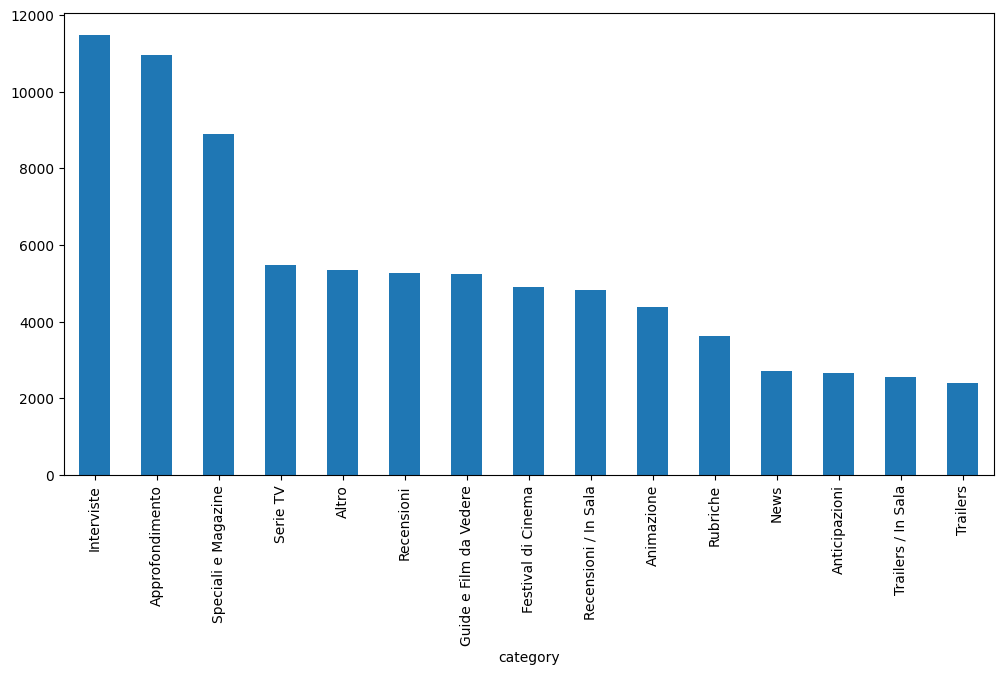

In [26]:
# Group by category, and compute mean content length
category_content_length = data.groupby("category")["content_length"].mean()

category_content_length.sort_values(ascending=False, inplace=True)
category_content_length.plot(kind="bar", figsize=(12, 6))

# Categorize content length, based on quantiles
content_length_quantiles = data["content_length"].quantile([0, 0.1, 0.25, 0.5, 0.75, 1]).values
content_length_labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]
data["content_length_category"] = pd.cut(data["content_length"], bins=content_length_quantiles, labels=content_length_labels, include_lowest=True)


In [28]:
# Creating mapping of categories based on how their  average content length positions within the overall quantiles
category_content_length = data.groupby("category")["content_length"].mean()
category_content_length_quantiles = pd.qcut(category_content_length, q=4, labels=["Very Short", "Short", "Medium", "Long"])

category_content_length_quantiles

category
Altro                         Medium
Animazione                     Short
Anticipazioni             Very Short
Approfondimento                 Long
Festival di Cinema             Short
Guide e Film da Vedere        Medium
Interviste                      Long
News                      Very Short
Recensioni                    Medium
Recensioni / In Sala           Short
Rubriche                       Short
Serie TV                        Long
Speciali e Magazine             Long
Trailers                  Very Short
Trailers / In Sala        Very Short
Name: content_length, dtype: category
Categories (4, object): ['Very Short' < 'Short' < 'Medium' < 'Long']